In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# MovieLens 1M

In [10]:
df = pd.read_csv("data/ml-1m/ratings.dat", sep="::", names=["user_id", "item_id", "rating", "timestamp"])
df.drop(columns=["timestamp"], inplace=True)

print("Nr. of ratings: %d" % len(df))
print("Nr. of users: %d" % df["user_id"].nunique())
print("Nr. of items: %d" % df["item_id"].nunique())
print("Density: %f" % (len(df) / (df["user_id"].nunique() * df["item_id"].nunique())))
print("Avg. nr. of ratings per user: %f" % df.groupby("user_id").size().mean())
print("Avg. nr. of ratings per item: %f" % df.groupby("item_id").size().mean())

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Nr. of ratings: 1000209
Nr. of users: 6040
Nr. of items: 3706
Density: 0.044684
Avg. nr. of ratings per user: 165.597517
Avg. nr. of ratings per item: 269.889099


# Douban

In [11]:
db_train_df = pd.read_csv("data/douban/db.train.rating", sep="\t", header=None, names=["user_id", "item_id", "rating"])
db_val_df = pd.read_csv("data/douban/db.valid.rating", sep="\t", header=None, names=["user_id", "item_id", "rating"])
db_test_df = pd.read_csv("data/douban/db.test.rating", sep="\t", header=None, names=["user_id", "item_id", "rating"])

df = db_train_df.append(db_val_df).append(db_test_df)

print("Nr. of ratings: %d" % len(df))
print("Nr. of users: %d" % df["user_id"].nunique())
print("Nr. of items: %d" % df["item_id"].nunique())
print("Density: %f" % (len(df) / (df["user_id"].nunique() * df["item_id"].nunique())))
print("Avg. nr. of ratings per user: %f" % df.groupby("user_id").size().mean())
print("Avg. nr. of ratings per item: %f" % df.groupby("item_id").size().mean())
#df.to_csv("data/douban/douban.csv", sep=";", header=False, index=False)

Nr. of ratings: 893575
Nr. of users: 2509
Nr. of items: 39576
Density: 0.008999
Avg. nr. of ratings per user: 356.147868
Avg. nr. of ratings per item: 22.578709


# LFM User Groups

In [12]:
df = pd.read_csv("data/lfm/user_events.txt", sep="\t", header=None, names=["user_id", "artist_id", "album_id", "track_id", "timestamp"])
df.head()

,user_id,artist_id,album_id,track_id,timestamp
0,31435741,2,4,4,1385212958
1,31435741,2,4,4,1385212642
2,31435741,2,4,4,1385212325
3,31435741,2,4,4,1385209508
4,31435741,2,4,4,1385209191


In [13]:
df_ = df.groupby(["user_id", "artist_id"]).size().reset_index(name='count')

scaled_df_events = pd.DataFrame()
for user_id, group in df_.groupby("user_id"):
    min_rating = group['count'].min()
    max_rating = group['count'].max()
    scaler = MinMaxScaler(feature_range=(1, 1000))
    scaled_ratings = scaler.fit_transform(group['count'].values.reshape(-1, 1).astype(float))
    new_rows = group.copy()
    new_rows['count'] = scaled_ratings
    scaled_df_events = scaled_df_events.append(new_rows)

print("Nr. of ratings: %d" % len(scaled_df_events))
print("Nr. of users: %d" % scaled_df_events["user_id"].nunique())
print("Nr. of items: %d" % scaled_df_events["artist_id"].nunique())
print("Density: %f" % (len(scaled_df_events) / (scaled_df_events["user_id"].nunique() * scaled_df_events["artist_id"].nunique())))
print("Avg. nr. of ratings per user: %f" % scaled_df_events.groupby("user_id").size().mean())
print("Avg. nr. of ratings per item: %f" % scaled_df_events.groupby("artist_id").size().mean())

scaled_df_events.columns = ["user_id", "item_id", "rating"]
#scaled_df_events.to_csv("data/lfm/artist_ratings.csv", sep=";", index=False, header=None)

Nr. of ratings: 1755361
Nr. of users: 3000
Nr. of items: 352805
Density: 0.001658
Avg. nr. of ratings per user: 585.120333
Avg. nr. of ratings per item: 4.975443


# Ciao

In [3]:
ciao_train_df = pd.read_csv("data/ciao/ciao.train.rating", sep="\t", header=None, names=["user_id", "item_id", "rating"])
ciao_val_df = pd.read_csv("data/ciao/ciao.valid.rating", sep="\t", header=None, names=["user_id", "item_id", "rating"])
ciao_test_df = pd.read_csv("data/ciao/ciao.test.rating", sep="\t", header=None, names=["user_id", "item_id", "rating"])

df = ciao_train_df.append(ciao_val_df).append(ciao_test_df)

print("Nr. of ratings: %d" % len(df))
print("Nr. of users: %d" % df["user_id"].nunique())
print("Nr. of items: %d" % df["item_id"].nunique())
print("Density: %f" % (len(df) / (df["user_id"].nunique() * df["item_id"].nunique())))
print("Avg. nr. of ratings per user: %f" % df.groupby("user_id").size().mean())
print("Avg. nr. of ratings per item: %f" % df.groupby("item_id").size().mean())

#df.to_csv("data/ciao/ciao.csv", sep=";", header=False, index=False)

Nr. of ratings: 282619
Nr. of users: 7375
Nr. of items: 105096
Density: 0.000365
Avg. nr. of ratings per user: 38.321220
Avg. nr. of ratings per item: 2.689151


# Goodreads

In [4]:
df = pd.read_csv("data/goodreads/goodreads_interactions.csv", sep=",", usecols=["user_id", "book_id", "rating"])
df.columns = ["user_id", "item_id", "rating"]
df = df[df["rating"] != 0]

In [5]:
user_sample = np.random.choice(df["user_id"].unique(), size=20000, replace=False)
df = df[df["user_id"].isin(user_sample)]
print("Nr. of ratings: %d" % len(df))
print("Nr. of users: %d" % df["user_id"].nunique())
print("Nr. of items: %d" % df["item_id"].nunique())
print("Density: %f" % (len(df) / (df["user_id"].nunique() * df["item_id"].nunique())))
print("Avg. nr. of ratings per user: %f" % df.groupby("user_id").size().mean())
print("Avg. nr. of ratings per item: %f" % df.groupby("item_id").size().mean())
#df.to_csv("data/goodreads/sample.csv", sep=";", header=None, index=False)

Nr. of ratings: 2592243
Nr. of users: 20000
Nr. of items: 509341
Density: 0.000254
Avg. nr. of ratings per user: 129.612150
Avg. nr. of ratings per item: 5.089406


# Unify separators

In [13]:
df = pd.read_csv("../datasets/ml-1m/ratings.dat", sep="::", names=["user_id", "item_id", "rating", "timestamp"])
df.to_csv("../datasets/ml-1m/ratings_tab.csv", sep="\t", header=None, index=False)
df.head()

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,user_id,item_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
df = pd.read_csv("../datasets/douban/douban.csv", sep=";", names=["user_id", "item_id", "rating"])
df.to_csv("../datasets/douban/ratings_tab.csv", sep="\t", header=None, index=False)
df.head()

,user_id,item_id,rating
0,0,99,4.0
1,0,16,5.0
2,0,142,4.0
3,0,120,4.0
4,0,135,5.0


In [19]:
df = pd.read_csv("../datasets/lfm/artist_ratings.csv", sep=";", names=["user_id", "item_id", "rating"])
df.to_csv("../datasets/lfm/ratings_tab.csv", sep="\t", header=None, index=False)
df.head()

,user_id,item_id,rating
0,1021445,12,184.222707
1,1021445,16,1.000000
2,1021445,28,27.174672
3,1021445,29,1.000000
4,1021445,46,1.000000


In [20]:
df = pd.read_csv("../datasets/ciao/ciao.csv", sep=";", names=["user_id", "item_id", "rating"])
df.to_csv("../datasets/ciao/ratings_tab.csv", sep="\t", header=None, index=False)
df.head()

,user_id,item_id,rating
0,0,670,5.0
1,0,159,5.0
2,0,120,4.0
3,0,75,4.0
4,0,427,4.0


In [21]:
df = pd.read_csv("../datasets/goodreads/sample.csv", sep=";", names=["user_id", "item_id", "rating"])
df.to_csv("../datasets/goodreads/ratings_tab.csv", sep="\t", header=None, index=False)
df.head()

,user_id,item_id,rating
0,73,22875,5
1,73,7972,5
2,73,22874,4
3,73,22873,3
4,73,22872,5


<AxesSubplot:>

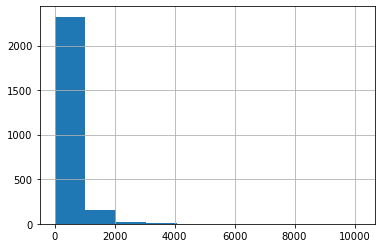

In [12]:
df = pd.read_csv("../datasets/douban/douban.csv", sep=";", names=["user_id", "item_id", "rating"])
df.groupby("user_id").size().hist()

In [15]:
X = np.random.randn(5, 8)
X[np.array(set(1, 2, 3))]

TypeError: set expected at most 1 arguments, got 3